---
title: "Introduction to Inferential Statistics"
author: Josie Athens
date: today
highlight-style: nord
format:
  html:
    code-fold: false
    theme: mint
    toc: true
    number-sections: true
    toc-title: Contents
    smooth-scroll: true
    embed-resources: true
    fig-width: 6
    fig-height: 4
execute: 
  cache: true
  warning: false
---

In [1]:
#| output: false
library(tidyverse)
library(rstatix)
library(easystats)
library(pubh)
library(sjlabelled)

jama = ggsci::scale_color_jama()
import::from(latex2exp, TeX)
import::from(epiDisplay, ci)
import::from(mosaic, xpnorm, xqnorm)
theme_set(see::theme_lucid(base_size = 10))
options('huxtable.knit_print_df' = FALSE)
options('huxtable.autoformat_number_format' = list(numeric = "%5.2f"))

library("repr")
options(repr.plot.width=6, repr.plot.height=4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


# Attaching packages: easystats 0.7.2 (red = needs update)
✔ bayestestR  0.13.2   ✔ correlation 0.8.5 
✔ datawizard  0.11.0   ✖ effectsize  0.8.8 
✔ insight     0.20.1   ✔ modelbased  0.8.8 
✔ performance 0.12.0   ✔ parameters  0.22.0
✔ report      0.5.8    ✔ see         0.8.4 

Restart the R-Session and update packages with `easystats::easystats_update()`.


Loading require

# Overview

To infer general conclusions at a population level from relatively small samples is important to have an unbiased sampling technique, so the sample *represents* the original population.

As an introduction to inferential statistics, we will look at sampling distributions, the concept of standard error and estimation of confidence intervals for continuous variables. We will also look at some aspects associated with study design including basic sample size calculations.

Once you have completed this laboratory, you should feel comfortable:

-   Obtaining random samples from populations.
-   Estimating reference range.
-   Estimating confidence intervals around the mean.
-   Estimating confidence intervals around proportions.
-   Estimating confidence intervals around counts.
-   Estimating sample sizes for studies comparing means.
-   Estimating sample sizes for studies comparing proportions.

## Summary of New Commands

| **Command**         | **Library**  | **Function**                                            |
|---------------------|--------------|---------------------------------------------------------|
| **as.numeric**      | *base*       | Coerces objects of type "numeric"                       |
| **bst**             | *pubh*       | Estimates bootstrap confidence intervals for the mean   |
| **ci**              | *epiDisplay* | Estimates confidence intervals                          |
| **gf_dist**         | *ggformula*  | Constructs density plots for theoretical distributions  |
| **n.for.2means**    | *epiDisplay* | Sample size for comparing two means                     |
| **n.for.2p**        | *epiDisplay* | Sample size for comparing two proportions               |
| **plots** | *see* | Displays two or more plots in a grid |
| **power.t.test**    | *stats*      | Power calculations for means                            |
| **prop_ord**        | *pubh*       | Calculates a proportion from OR and a second proportion |
| **reference_range** | *pubh*       | Calculated the reference interval                       |
| **slice_sample**    | *dplyr*      | Takes random samples                                    |
| **t_test**          | *rstatix*    | Performs $t$-tests                                      |
| **xpnorm**          | *mosaic*     | Calculates probabilities for the Normal distribution    |
| **xqnorm**          | *mosaic*     | Calculates $z$ values for the Normal distribution       |

# Introduction

To understand probability distributions, we will use the following variables

| **Variable** | **Distribution** | **Dataset**         |
|--------------|------------------|---------------------|
| `chd`        | Binomial         | `wcgs`              |
| `ncigs`      | Poisson          | `wcgs`              |
| `height`     | Normal           | `wcgs`              |
| `IgM`        | Log-Normal       | `IgM` (from `ISwR`) |
| `age`        | Not normal       | `wcgs`              |
| `dbp`        | Not normal       | `wcgs`              |

We start by loading data into our session:

In [2]:
wcgs = read_rds('data/wcgs.rds')
data(IgM, package = "ISwR")

`IgM` is a vector, hence we will create a dataset which includes the vector.

In [3]:
serum = tibble(IgM)

# The Normal distribution

:::{.callout-tip}
## Example

A normal curve was calculated from the diastolic blood pressures of 500 men (mean 82 mm Hg, standard deviation 10 mm Hg). What is the probability of finding a man with a DBP \> 72 mm Hg if we assume a normal distribution?
:::

Before we answer this problem, we need to think about our answer. By definition, the mean value is at the centre, so the area under the curve (AUC) AUC = 50% to each side. As the value of 72 is less than the mean (82), we already know that the solution has to be greater than 50%.

The function `xpnorm` gives us the AUC to the left of the given value (meaning *less than*). As the total AUC = 1, to find probabilities *higher than* we can subtract from 1.




If X ~ N(82, 10), then 


	P(X <= 72) = P(Z <= -1) = 0.1587

	P(X >  72) = P(Z >  -1) = 0.8413






[1] 0.8413447

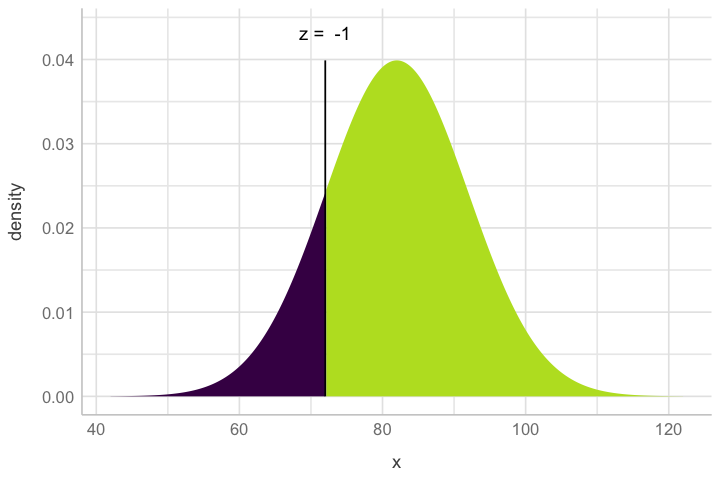

In [4]:
1 - xpnorm(72, mean = 82, sd = 10)

:::{.callout-tip}
## Exercise

What is the probability of finding a man with a DBP \< 65 mm Hg in our current example?
:::




If X ~ N(82, 10), then 


	P(X <= 65) = P(Z <= -1.7) = 0.04457

	P(X >  65) = P(Z >  -1.7) = 0.9554






[1] 0.04456546

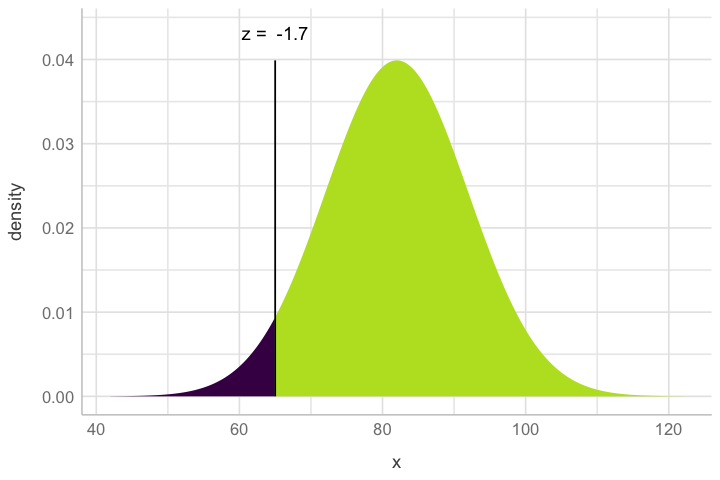

In [5]:
#| code-fold: true
xpnorm(65, mean = 82, sd = 10)

What would be the value of DBP which would contain 97.5% of the population (to the left of the curve)?

This is the opposite problem than the previous one. Now we know the probability and would like to know the value that would contain that probability. For finding *quantiles* in the normal curve, we use `qnorm`.




If X ~ N(82, 10), then 


	P(X <= 101.5996) = 0.975

	P(X >  101.5996) = 0.025






[1] 101.5996

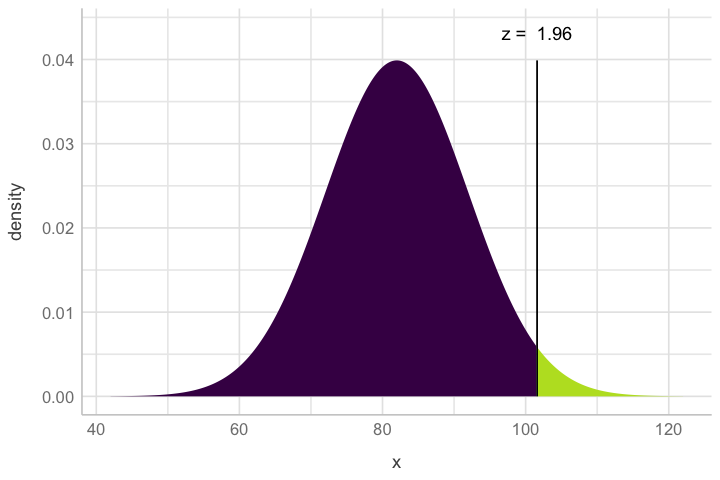

In [6]:
xqnorm(0.975, mean = 82, sd = 10)

:::{.callout-tip}
## Exercise

What would be value of DBP which would contain 2.5% of the population (to the left of the curve)?
:::




If X ~ N(82, 10), then 


	P(X <= 62.40036) = 0.025

	P(X >  62.40036) = 0.975






[1] 62.40036

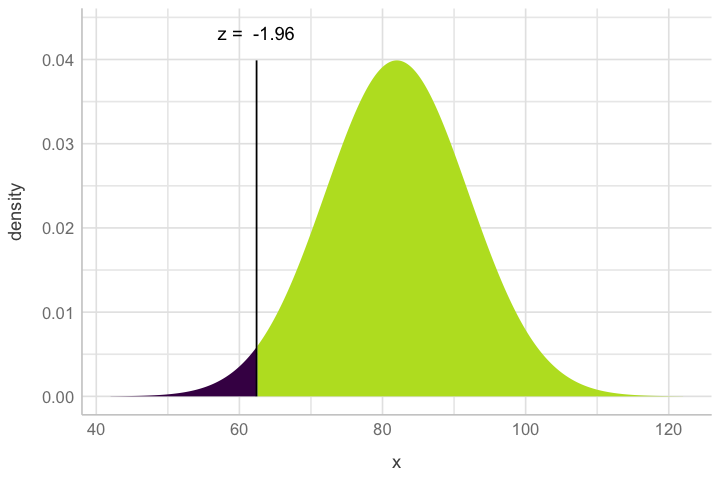

In [7]:
#| code-fold: true
xqnorm(0.025, mean = 82, sd = 10)

So, the limits that would contain 95% of the population around the mean are:

In [8]:
reference_range(82, 10) %>%
  round(2)

lower.ri,upper.ri
<dbl>,<dbl>
62.4,101.6


Which $z$-value would contain 97.5% of the standard normal curve?




If X ~ N(0, 1), then 


	P(X <= 1.959964) = 0.975

	P(X >  1.959964) = 0.025






[1] 1.959964

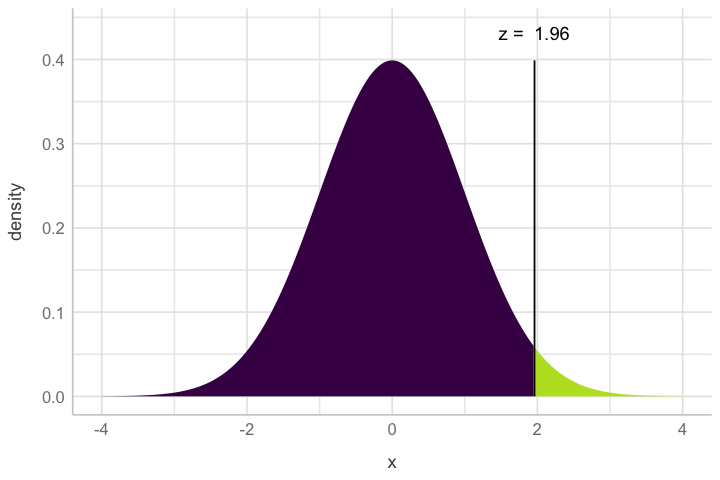

In [9]:
xqnorm(0.975)

:::{.callout-note}
For a normal distribution: 95% of the population is within $\approx 2$ standard deviations around the mean; 99% of the population is within $\approx 3$ standard deviations around the mean.
:::

:::{.callout-tip}
## Exercise

Construct a table of the following statistics: mean, standard deviation, median and skewness for the variable `height` from the `wcgs` dataset.
:::

In [10]:
#| code-fold: true
wcgs |>
  select(height) |>
  describe_distribution()

Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
height,177.2355,6.422881,10.16,152.4,198.12,-0.1986184,0.2798079,3154,0


:::{.callout-tip}
## Exercise 

Construct a histogram with a normal density plot and a QQ-plot for the variable `height` from the `wcgs` dataset.
:::

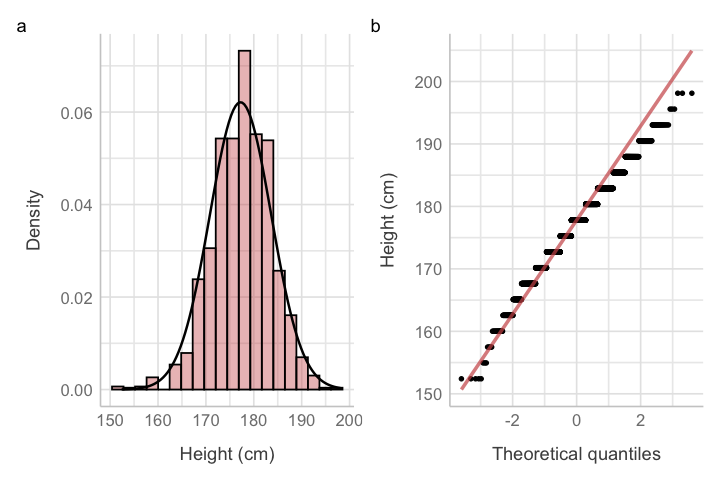

In [11]:
#| label: fig-fig1
#| fig-cap: "Distribution of height in males from the WCGS data set. (a) Density plot. (b) QQ-plot against the standard normal distribution."
#| code-fold: true
p1 = wcgs |>
  hist_norm(~ height) |>
  axis_labs()

p2 = wcgs |>
  qq_plot(~ height) |>
  axis_labs()

plots(p1, p2, n_columns = 2, tags = letters[1:2])

:::{.callout-tip}
## Question

What are your conclusions?
:::

:::{.callout-note}
## Answer

Height in males follows a normal distribution.
:::

:::{.callout-tip}
## Exercise

Is DBP normally distributed in the subset of males who did not have a CHD event in the `wcgs` dataset? Construct a table of the following statistics: mean, standard deviation, median, and skewness for the variable `dbp` from the `wcgs` dataset.
:::

In [12]:
#| code-fold: true
wcgs |>
  select(dbp) |>
  describe_distribution()

Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
dbp,82.01554,9.72688,10,58,150,0.9283029,2.369237,3154,0


:::{.callout-tip}
## Exercise

Construct a histogram with a normal density plot and a QQ-plot for the variable `dbp` from the `wcgs` dataset.
:::

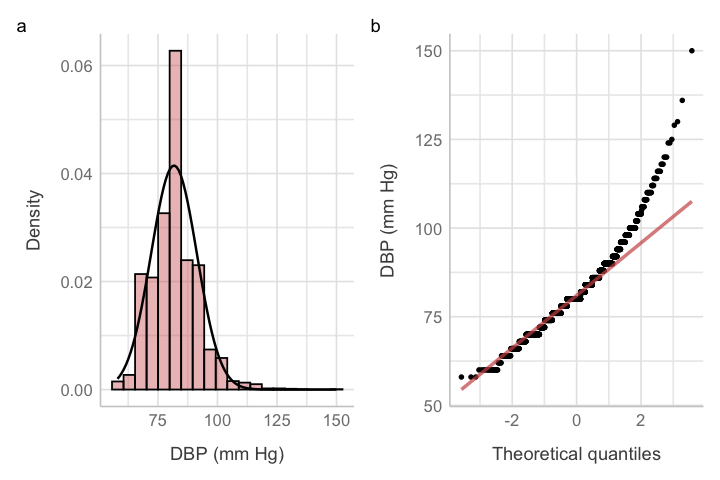

In [13]:
#| label: fig-fig2
#| fig-cap: "Distribution of diastolic blood pressure in males from the WCGS data set. (a) Density plot. (b) QQ-plot against the standard normal distribution."
#| code-fold: true
p1 = wcgs |>
  filter(chd == "No CHD") |>
  hist_norm(~ dbp) |>
  axis_labs()

p2 = wcgs |>
  filter(chd == "No CHD") |>
  qq_plot(~ dbp) |>
  axis_labs()

plots(p1, p2, n_columns = 2, tags = letters[1:2])

## Log-normal distribution

:::{.callout-tip}
## Exercise:

Construct a table of the following statistics: mean, standard deviation, median and skewness for the variable `IgM` from the `serum` dataset.
:::

In [14]:
#| code-fold: true
serum |>
  select(IgM) |>
  describe_distribution()

Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
IgM,0.8030201,0.4694982,0.5,0.1,4.5,2.56733,13.69895,298,0


:::{.callout-tip}
## Exercise

Construct a histogram with a normal density plot and a QQ-plot for the variable `IgM`.
:::

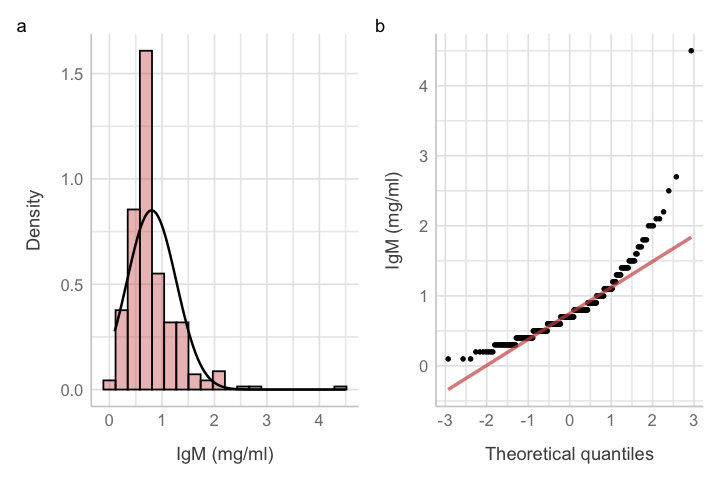

In [15]:
#| label: fig-fig3
#| fig-cap: "Distribution of serum IgM. (a) Density plot. (b) QQ-plot against the standard normal distribution."
#| code-fold: true
p1 = serum |>
  hist_norm(~ IgM, xlab = "IgM (mg/ml)")

p2 = serum |>
  qq_plot(~ IgM, ylab = "IgM (mg/ml)")

plots(p1, p2, n_columns = 2, tags = letters[1:2])

:::{.callout-tip}
## Question

What are your conclusions?
:::

:::{.callout-note}
## Answer

`IgM` is not normally distributed as it has a positive skew. The QQ-plot shows deviations from normality and shows a J-shape.
:::

:::{.callout-tip}
## Exercise

Construct a histogram with a normal density plot and a QQ-plot for log-transformed version of `IgM.` (tip: use `~ log(IgM)` in your formula).
:::

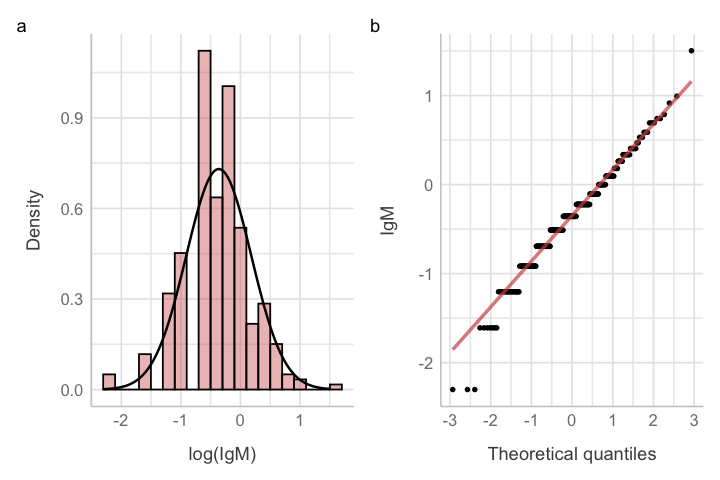

In [16]:
#| label: fig-fig4
#| fig-cap: "Distribution of serum IgM. (a) Density plot. (b) QQ-plot against the standard normal distribution."
#| code-fold: true
p1 = serum |>
  hist_norm(~ log(IgM))

p2 = serum |>
  qq_plot(~ log(IgM))

plots(p1, p2, n_columns = 2, tags = letters[1:2])

:::{.callout-tip}
## Question

What are your conclusions?
:::

:::{.callout-note}
## Answer

When log-transformed, `IgM` follows a normal distribution.
:::

# Random Sampling

When we take a sample, we calculate a *statistic*, an estimate of a *parameter* in the original population where the sample was initially taken.

This process, of statistical inference is reliable and robust if the process is not biased. One way to avoid bias is through random sampling. The function `sample` allows us to take random samples from variables.

To have the same results, we will set up a seed before the sampling

In [17]:
set.seed(576)

Look at the statistics from random samples with decreasing sample size.

In [18]:
rbind(
  wcgs |> estat(~ height),
  wcgs |> slice_sample(n = 100) |>
    copy_labels(wcgs) |> estat(~ height),
  wcgs |> slice_sample(n = 50) |>
    copy_labels(wcgs) |> estat(~ height),
  wcgs |> slice_sample(n = 25) |>
    copy_labels(wcgs) |> estat(~ height),
  wcgs |> slice_sample(n = 10) |>
    copy_labels(wcgs) |> estat(~ height)
)

,N,Min,Max,Mean,Median,SD,CV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Height (cm),3154,152.40,198.12,177.24,177.80,6.42,0.04
Height (cm),100,160.02,193.04,176.12,175.26,6.74,0.04
Height (cm),50,160.02,187.96,177.09,177.80,6.18,0.03
Height (cm),25,165.10,193.04,178.21,180.34,7.06,0.04
Height (cm),10,170.18,185.42,179.32,179.07,5.11,0.03


So, even with a sample size as small as $n = 25$, the statistics are still a good estimate of the original values in the population.

Height is a continues variable that follows a normal distribution, what is the case for categorical variables?

In [19]:
wcgs |> freq_table(chd)

wcgs |> slice_sample(n = 100) |> freq_table(chd)

wcgs |> slice_sample(n = 50) |> freq_table(chd)

wcgs |> slice_sample(n = 25) |> freq_table(chd)

wcgs |> slice_sample(n = 10) |> freq_table(chd)

chd,n,prop
<fct>,<int>,<dbl>
No CHD,2897,91.9
CHD,257,8.1


chd,n,prop
<fct>,<int>,<dbl>
No CHD,88,88
CHD,12,12


chd,n,prop
<fct>,<int>,<dbl>
No CHD,48,96
CHD,2,4


chd,n,prop
<fct>,<int>,<dbl>
No CHD,24,96
CHD,1,4


chd,n,prop
<fct>,<int>,<dbl>
No CHD,9,90
CHD,1,10


# Confidence Intervals

Reference range and confidence intervals are not the same.

-   The reference range is about the limits that would contain 95% of the observations in a sample or population.

-   The confidence interval is about the limits that would contain a given proportion (most of the times, 95%; sometimes, 99%) of the true value of a given parameter (e.g., the mean) in a population.

For the calculation of the reference range, we used about two standard deviations ($\sim$ 1.96) around the mean (as we assumed a normal distribution). For the confidence interval, we use about two standard errors around the mean.

## $t$-distribution

The $t$-distribution is also bell shaped, but with a heavier tail. It has one more parameter than the normal distribution: the degrees of freedom (df). For our current example:

$$df = n-1$$

where $n$ is the sample size. As the sample size increases, the $t$-distribution is almost the same as the normal distribution (for $n>30$).

For illustration purposes, let's take a look at the density plot of a $t$-distribution.

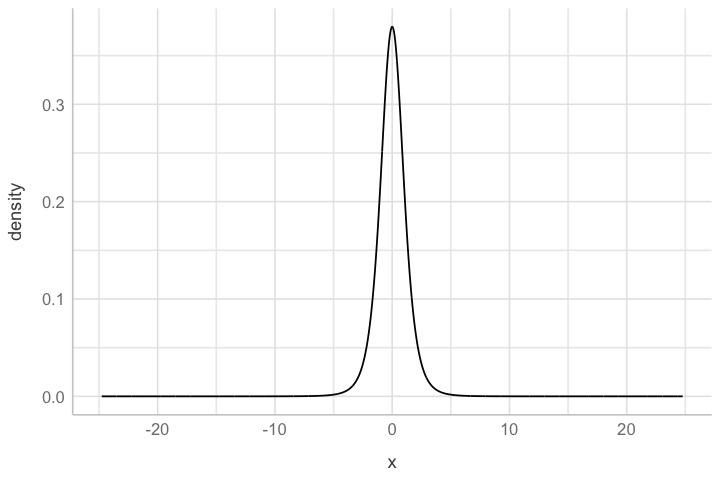

In [20]:
#| label: fig-fig5
#| fig-cap: "Density plot of a t-distribution with five degrees of freedom."
gf_dist("t", df = 5)

In the next lab, we will learn about hypothesis testing. In `R` every time we do hypothesis testing, a confidence interval is also shown.

A calculation of the 95% CI for continuous variables can be estimated with the argument `detailed = TRUE` in `t_test`. For example, for `height` the CI is:

In [21]:
wcgs |>
  t_test(height ~ 1, detailed = TRUE) |>
  as.data.frame()

estimate,.y.,group1,group2,n,statistic,p,df,conf.low,conf.high,method,alternative
<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
177.2355,height,1,null model,3154,1549.714,0,3153,177.0112,177.4597,T-test,two.sided


We can also use the function `ci` from `epiDisplay`:

In [22]:
wcgs %$% ci(height)

,n,mean,sd,se,lower95ci,upper95ci
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,3154,177.2355,6.422881,0.1143666,177.0112,177.4597


## Introduction to Bootstrap

The advantage of bootstrap is that we can generate a big number of means (most of the times in the order of thousand or ten thousand) even from small samples, to estimate a narrower CI (as our sample of means is greater than the number of observations in our original sample).

The function `bst` from the `pubh` package allows us to estimate CI around the mean.

In [23]:
wcgs %$% bst(height)

,stat,estimate,%CI,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
,mean,177.24,95,177.03,177.46


As an example, the 99% bootstrap CI for the mean value of `height`, using ten thousand replicates, would be:

In [24]:
wcgs %$% bst(height, n = 1e4, CI = 99)

,stat,estimate,%CI,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
,mean,177.24,99,176.93,177.54


## Confidence intervals for proportions

A calculation of the 95% CI for binomial variables can be estimated with the function `ci`. For example, for `chd` the CI is:

In [25]:
wcgs %$% ci(chd) %>% round(3)

,events,total,probability,se,exact.lower95ci,exact.upper95ci
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,257,3154,0.081,0.005,0.072,0.092


::: callout-tip
## Question

What is your interpretation?
:::

::: callout-note
## Answer

The prevalence of coronary heart disease in the population of males where the WCGS was sampled was: 8.1% (95% CI: 7.2, 9.2%).
:::

# Sample Size

We will not need a data set for this section. The command for power and sample size for means is `power.t.test` from the `stats` library. For proportions, the command is `n.for.2p` from the `epiDisplay` library.

## One-sample mean

::: callout-tip
## Example

Consider a study of the effect of a calcium channel blocking agent on heart rate for patients with unstable angina. Suppose we want to have at least 80% power for detecting a significant difference if the smallest clinically interesting effect of the drug is to change mean heart rate by five beats per minute (bpm) over 48 hours. Assume that the standard deviation for changes in bpm over 48 hours is ten bpm. How many patients should be enrolled in such a study? This is a one-sample test (paired $t$-test on a change in heart rate).
:::

In [26]:
power.t.test(
  delta = 5, sd = 10, sig.level = 0.05,
  power = 0.80, type = "one.sample"
)


     One-sample t test power calculation 

              n = 33.3672
          delta = 5
             sd = 10
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


:::{.callout-tip}
## Example

We wish to test the effects of a low-fat diet on serum cholesterol levels. We will measure the difference in cholesterol level for each subject before and after being on a diet. We will consider a reduction in 10 mg/dl as significant. We wish to have a power of 0.80 with a $\sigma$ = 0.05. From previous studies, we know that the standard deviation of the difference in cholesterol would be about 50 mg/dl.
:::

In [27]:
power.t.test(
  delta = 10, sd = 50, sig.level = 0.05,
  power = 0.80, type = "one.sample"
)


     One-sample t test power calculation 

              n = 198.1513
          delta = 10
             sd = 50
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


## Two-sample means

:::{.callout-tip}
## Example

Suppose that instead of a single group design, they had a control group also, and the researches would like to compare the cholesterol levels at two months post-intervention. If they assume equal variances, what is the estimated sample size then?
:::

In [28]:
power.t.test(
  delta = 10, sd = 50, sig.level = 0.05,
  power = 0.80
)


     Two-sample t test power calculation 

              n = 393.4067
          delta = 10
             sd = 50
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


When comparing two means, we can also use `n.for.2means` which has the advantage of allowing different values of standard deviations for each sample (not the case in our current example).

In [29]:
#| output: false
library(epiDisplay)

Loading required package: foreign

Loading required package: survival

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:gtsummary’:

    select


The following object is masked from ‘package:rstatix’:

    select


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nnet


Attaching package: ‘epiDisplay’


The following object is masked from ‘package:lattice’:

    dotplot


The following object is masked from ‘package:pubh’:

    mhor


The following object is masked from ‘package:scales’:

    alpha


The following object is masked from ‘package:parameters’:

    ci


The following object is masked from ‘package:bayestestR’:

    ci


The following object is masked from ‘package:ggplot2’:

    alpha




In [30]:
n.for.2means(mu1 = 0, mu2 = 10, sd1 = 50, sd2 = 50)

mu1,mu2,sd1,sd2,n1,n2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,10,50,50,392,392


It is often the case that we have a limited sample size, due to the availability of participants or due to time or funding.

:::{.callout-tip}
## Example

Suppose you would like to test the effects of caffeine on time to exhaustion in trained cyclists, 10% below their anaerobic threshold. You believe that a difference of 1 minute is meaningful, and you have 12 willing participants whom you will randomise to placebo or caffeine. From a review of the literature, it appears that a reasonable estimate for the standard deviation is 1.5 minutes. What is the power of this study, assuming a two-sided test using $\sigma$ = 0.05?
:::

In [31]:
power.t.test(delta = 1, sd = 1.5, sig.level = 0.05, n = 6)


     Two-sample t test power calculation 

              n = 6
          delta = 1
             sd = 1.5
      sig.level = 0.05
          power = 0.1805033
    alternative = two.sided

NOTE: n is number in *each* group


What should you do? How big would your sample size have to be to have 80% power?

In [32]:
power.t.test(delta = 1, sd = 1.5, sig.level = 0.05, power = 0.8)


     Two-sample t test power calculation 

              n = 36.3058
          delta = 1
             sd = 1.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


## Two-sample proportions

:::{.callout-tip}
## Example

A scientist wants to compare rates of prematurity in infants born to women who attend prenatal clinics ($p_1$ = 0.25) with non-attenders ($p_2$ = 0.40). Because recruitment of non-attenders is difficult, the scientist decides to study half as many non-attenders (ratio = 2). Find $n_1$ and $n_2$ to ensure $\sigma$ = 0.01 and 95% power.
:::

In [33]:
n.for.2p(p1 = 0.25, p2 = 0.4, alpha = 0.01, power = 0.95, ratio = 0.5)

p1,p2,n1,n2
<dbl>,<dbl>,<dbl>,<dbl>
0.25,0.4,531,265


:::{.callout-tip}
## Example

A cohort study of smoking and coronary heart disease (CHD) in middle-aged men is planned. A sample of men will be selected at random from the population and will be asked to complete a questionnaire. The follow-up period will be five years. The investigators would like to be 0.90 sure of being able to detect when the risk ratio of CHD is 1.4 for smokers, using a 0.05 significance test. Previous evidence suggests that the death rate in non-smokers is 413 per 100000 per year. Assuming equal numbers of smokers and non-smokers are sampled, how many should be sampled overall?
:::

In [34]:
n.for.2p(p1 = 5 * 413/1e5, p2 = 1.4 * 5 * 413/1e5, power = 0.9)

p1,p2,n1,n2
<dbl>,<dbl>,<dbl>,<dbl>
0.02065,0.02891,7682,7682


:::{.callout-note}
The proportion of the control group (non-smokers) is: (5 $\times$ 413/100000) whereas the proportion for the exposed group (smokers) is 1.4 times greater.
:::

:::{.callout-tip}
## Example

A case-control study of the relationship between smoking and CHD is planned. A sample of men with newly diagnosed CHD will be compared for smoking status with a sample of controls. Assuming an equal number of cases and controls, how many are needed to detect an approximate odds ratio of 2.0 with 0.90 power using a two-sided 0.05 test? Previous surveys indicate that 0.30 of the male population are smokers.
:::

In [35]:
prop_or(p2 = 0.3, or = 2) |> round(3)

[1] 0.462

In other words, in the *healthy*, control group we have 30% of smokers, and we expect a 46% of smokers in the CHD group to achieve, at least, an OR = 2.

In [36]:
n.for.2p(p1 = 0.3, p2 = prop_or(p2 = 0.3, or = 2), power = 0.9)

p1,p2,n1,n2
<dbl>,<dbl>,<dbl>,<dbl>
0.3,0.4615385,200,200
